## Importing Python Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from skimage.transform import resize

## Set the path to main directory

In [2]:
path = os.path.abspath('..')  # Absolute Path to main folder

## Simulation CSV to Image Tensor to Video Sequences

In [3]:
path_pf_sim = path+'/Step_0_phase_field_simulations/exodus_files'  # Path to exodus folder of simulation

path_sim_0 = path_pf_sim+'/sim_0/csv_files/'
path_sim_1 = path_pf_sim+'/sim_1/csv_files/'
path_sim_2 = path_pf_sim+'/sim_2/csv_files/'
path_sim_3 = path_pf_sim+'/sim_3/csv_files/'
path_sim_4 = path_pf_sim+'/sim_4/csv_files/'
path_sim_5 = path_pf_sim+'/sim_5/csv_files/'

path_Pd_Rh = path_pf_sim+'/Pd_Rh/csv_files/'
path_Cu_Mn = path_pf_sim+'/Cu_Mn/csv_files/'

### Simulation 0

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 180 x 401 x 401


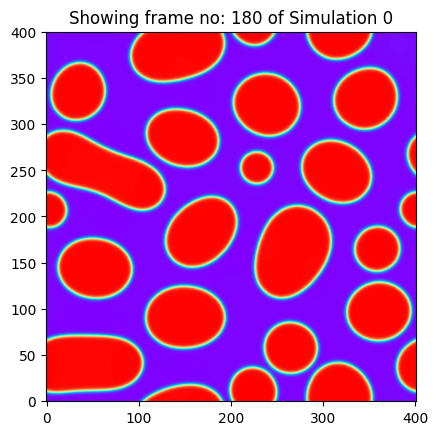

In [4]:
sim_no = 0 # Simulation No
csv_files = natsorted(glob.glob(path_sim_0+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_0 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_0 = data_sim_0.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_0 = np.transpose(data_sim_0, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_0/sim_0.npy', data_sim_0) # Saving the numpy file

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_0[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (180, 401, 401)
 Reduced Resolution: (180, 64, 64)


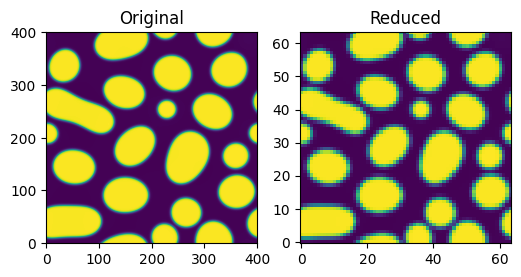

In [5]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_0.shape[0], 64, 64)
sim_0_low_res = reduce_pixel_size(data_sim_0, new_shape)
print(f'Original Resolution: {data_sim_0.shape}\n Reduced Resolution: {sim_0_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_0[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_0_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [6]:
##### Video Sequences #####

VS_sim_0 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_0_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_0_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_0.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_0 = np.array(VS_sim_0)  # convert list to numpy array
np.save(path_pf_sim+'/sim_0/VS_0.npy', VS_sim_0) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_0_low_res.shape}\nVideo Sequence Shape: {VS_sim_0.shape}')

Total Image Frame Shape: (180, 64, 64)
Video Sequence Shape: (535, 20, 64, 64)


Displaying frames from Video Sequence No: 102.


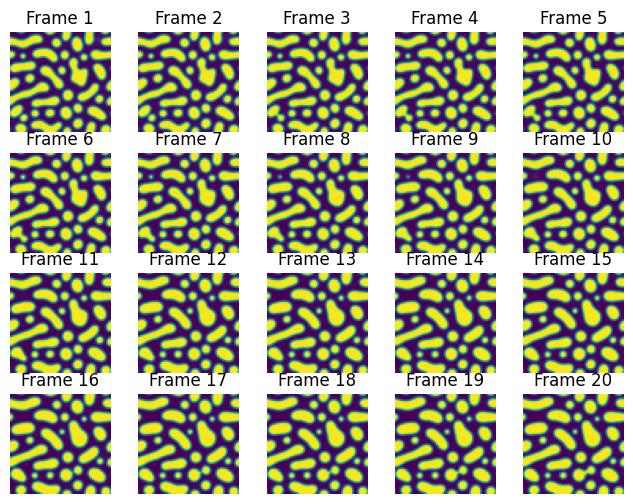

In [7]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_0)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_0[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Simulation 1

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 178 x 401 x 401


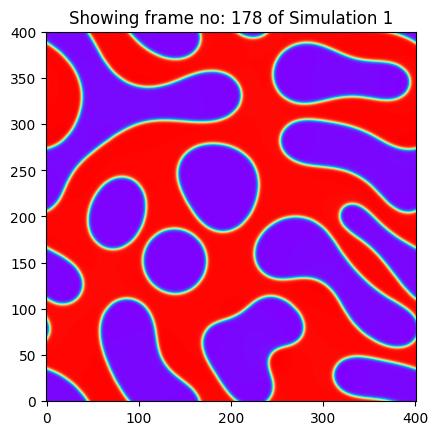

In [8]:
sim_no = 1 # Simulation No
csv_files = natsorted(glob.glob(path_sim_1+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_1 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_1 = data_sim_1.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_1 = np.transpose(data_sim_1, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_1/sim_1.npy', data_sim_1) # Saving the numpy file

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_1[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (178, 401, 401)
 Reduced Resolution: (178, 64, 64)


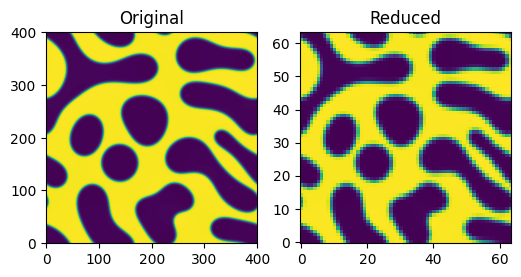

In [9]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_1.shape[0], 64, 64)
sim_1_low_res = reduce_pixel_size(data_sim_1, new_shape)
print(f'Original Resolution: {data_sim_1.shape}\n Reduced Resolution: {sim_1_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_1[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_1_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [10]:
##### Video Sequences #####

VS_sim_1 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_1_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_1_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_1.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_1 = np.array(VS_sim_1)  # convert list to numpy array
np.save(path_pf_sim+'/sim_1/VS_1.npy', VS_sim_1) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_1_low_res.shape}\nVideo Sequence Shape: {VS_sim_1.shape}')

Total Image Frame Shape: (178, 64, 64)
Video Sequence Shape: (531, 20, 64, 64)


Displaying frames from Video Sequence No: 272.


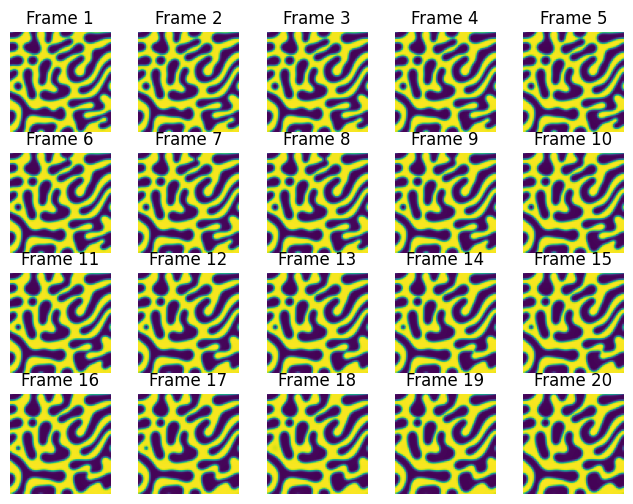

In [11]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_1)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_1[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Simulation 2

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 181 x 401 x 401


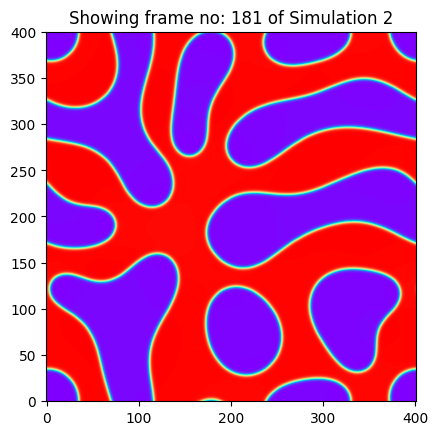

In [12]:
sim_no = 2 # Simulation No
csv_files = natsorted(glob.glob(path_sim_2+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_2 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_2 = data_sim_2.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_2 = np.transpose(data_sim_2, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_2/sim_2.npy', data_sim_2) # Saving the numpy file

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_2[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (181, 401, 401)
 Reduced Resolution: (181, 64, 64)


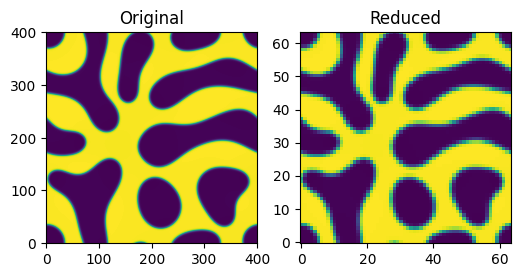

In [13]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_2.shape[0], 64, 64)
sim_2_low_res = reduce_pixel_size(data_sim_2, new_shape)
print(f'Original Resolution: {data_sim_2.shape}\n Reduced Resolution: {sim_2_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_2[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_2_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [14]:
##### Video Sequences #####

VS_sim_2 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_2_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_2_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_2.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_2 = np.array(VS_sim_2)  # convert list to numpy array
np.save(path_pf_sim+'/sim_2/VS_2.npy', VS_sim_2) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_2_low_res.shape}\nVideo Sequence Shape: {VS_sim_2.shape}')

Total Image Frame Shape: (181, 64, 64)
Video Sequence Shape: (541, 20, 64, 64)


Displaying frames from Video Sequence No: 331.


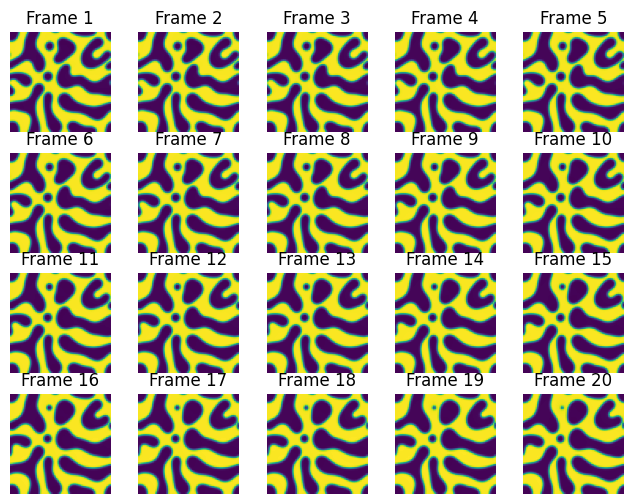

In [15]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_2)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_2[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Simulation 3

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 246 x 401 x 401


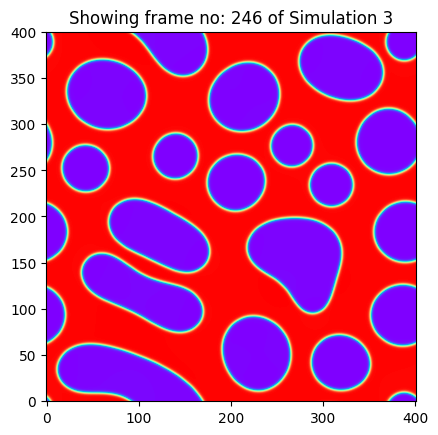

In [16]:
sim_no = 3 # Simulation No
csv_files = natsorted(glob.glob(path_sim_3+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_3 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_3 = data_sim_3.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_3 = np.transpose(data_sim_3, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_3/sim_3.npy', data_sim_3) # Saving the numpy file

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_3[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (246, 401, 401)
 Reduced Resolution: (246, 64, 64)


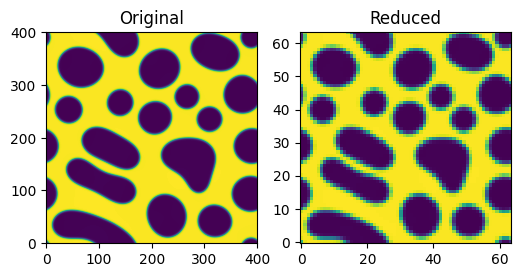

In [17]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_3.shape[0], 64, 64)
sim_3_low_res = reduce_pixel_size(data_sim_3, new_shape)
print(f'Original Resolution: {data_sim_3.shape}\n Reduced Resolution: {sim_3_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_3[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_3_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [18]:
##### Video Sequences #####

VS_sim_3 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_3_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_3_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_3.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_3 = np.array(VS_sim_3)  # convert list to numpy array
np.save(path_pf_sim+'/sim_3/VS_3.npy', VS_sim_3) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_3_low_res.shape}\nVideo Sequence Shape: {VS_sim_3.shape}')

Total Image Frame Shape: (246, 64, 64)
Video Sequence Shape: (758, 20, 64, 64)


Displaying frames from Video Sequence No: 295.


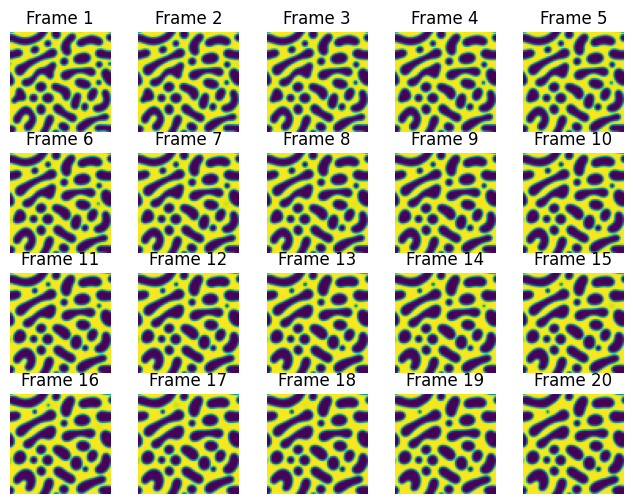

In [19]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_3)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_3[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Simulation 4

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 218 x 401 x 401


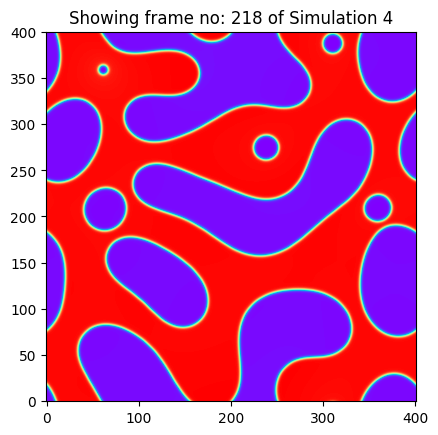

In [20]:
sim_no = 4 # Simulation No
csv_files = natsorted(glob.glob(path_sim_4+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_4 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_4 = data_sim_4.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_4 = np.transpose(data_sim_4, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_4/sim_4.npy', data_sim_4) # Saving the numpy file

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_4[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (218, 401, 401)
 Reduced Resolution: (218, 64, 64)


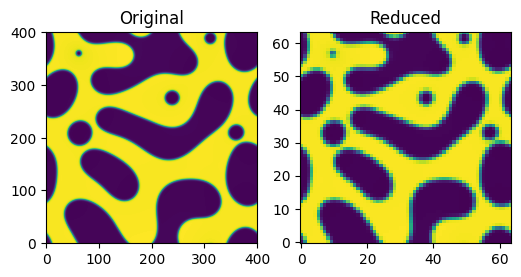

In [21]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_4.shape[0], 64, 64)
sim_4_low_res = reduce_pixel_size(data_sim_4, new_shape)
print(f'Original Resolution: {data_sim_4.shape}\n Reduced Resolution: {sim_4_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_4[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_4_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [22]:
##### Video Sequences #####

VS_sim_4 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_4_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_4_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_4.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_4 = np.array(VS_sim_4)  # convert list to numpy array
np.save(path_pf_sim+'/sim_4/VS_4.npy', VS_sim_4) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_4_low_res.shape}\nVideo Sequence Shape: {VS_sim_4.shape}')

Total Image Frame Shape: (218, 64, 64)
Video Sequence Shape: (662, 20, 64, 64)


Displaying frames from Video Sequence No: 331.


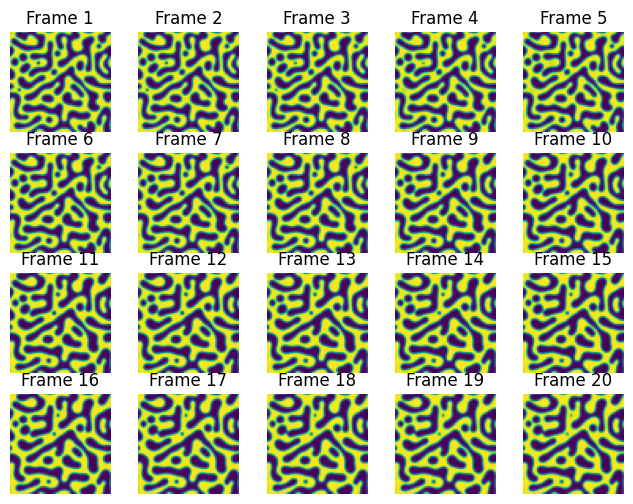

In [23]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_4)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_4[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Simulation 5

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 199 x 401 x 401


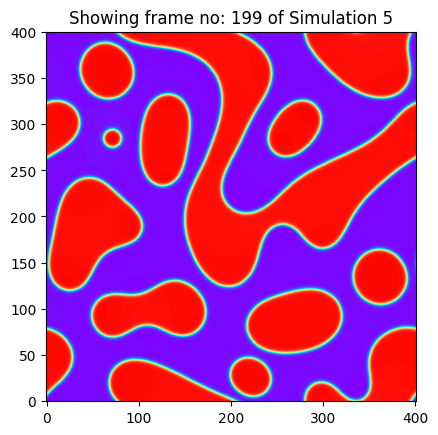

In [24]:
sim_no = 5 # Simulation No
csv_files = natsorted(glob.glob(path_sim_5+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_sim_5 = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_sim_5 = data_sim_5.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_sim_5 = np.transpose(data_sim_5, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/sim_5/sim_5.npy', data_sim_5) # Saving the numpy file 

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_sim_5[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (199, 401, 401)
 Reduced Resolution: (199, 64, 64)


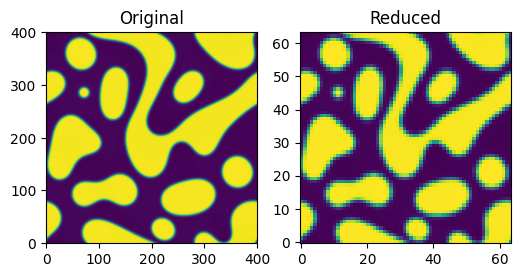

In [25]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_sim_5.shape[0], 64, 64)
sim_5_low_res = reduce_pixel_size(data_sim_5, new_shape)
print(f'Original Resolution: {data_sim_5.shape}\n Reduced Resolution: {sim_5_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_sim_5[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(sim_5_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [26]:
##### Video Sequences #####

VS_sim_5 = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, sim_5_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = sim_5_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_sim_5.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_sim_5 = np.array(VS_sim_5)  # convert list to numpy array
np.save(path_pf_sim+'/sim_5/VS_5.npy', VS_sim_5) # saving the Video Sequences 

print(f'Total Image Frame Shape: {sim_5_low_res.shape}\nVideo Sequence Shape: {VS_sim_5.shape}')

Total Image Frame Shape: (199, 64, 64)
Video Sequence Shape: (598, 20, 64, 64)


Displaying frames from Video Sequence No: 248.


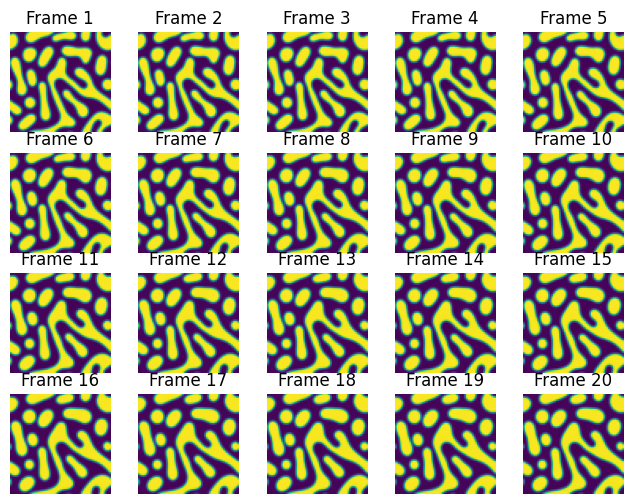

In [27]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_sim_5)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_sim_5[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

### Combining all Training Set of Video Sequences

In [28]:
VS = np.concatenate((VS_sim_0, VS_sim_1, VS_sim_2, VS_sim_3, VS_sim_4, VS_sim_5), axis=0)
np.save(path+'/Step_1_train_test_data/VS_train_test.npy', VS)

In [39]:
VS.shape

(3625, 20, 64, 64)

## Engineering Alloy Pd_Rh

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 414 x 401 x 401


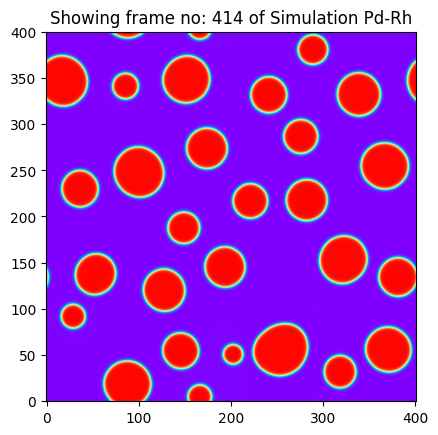

In [29]:
sim_no = 'Pd-Rh' # Simulation Id
csv_files = natsorted(glob.glob(path_Pd_Rh+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_Pd_Rh = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_Pd_Rh = data_Pd_Rh.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_Pd_Rh = np.transpose(data_Pd_Rh, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/Pd_Rh/Pd_Rh.npy', data_Pd_Rh) # Saving the numpy file 

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_Pd_Rh[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (414, 401, 401)
 Reduced Resolution: (414, 64, 64)


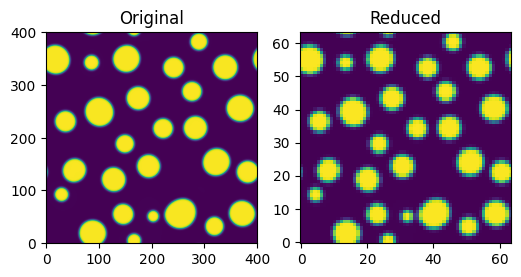

In [30]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_Pd_Rh.shape[0], 64, 64)
Pd_Rh_low_res = reduce_pixel_size(data_Pd_Rh, new_shape)
print(f'Original Resolution: {data_Pd_Rh.shape}\n Reduced Resolution: {Pd_Rh_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_Pd_Rh[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(Pd_Rh_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [31]:
##### Video Sequences #####

VS_Pd_Rh = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, Pd_Rh_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = Pd_Rh_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_Pd_Rh.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_Pd_Rh = np.array(VS_Pd_Rh)  # convert list to numpy array
np.save(path+'/Step_1_train_test_data/VS_Pd_Rh.npy', VS_Pd_Rh) # saving the Video Sequences 

print(f'Total Image Frame Shape: {Pd_Rh_low_res.shape}\nVideo Sequence Shape: {VS_Pd_Rh.shape}')

Total Image Frame Shape: (414, 64, 64)
Video Sequence Shape: (1314, 20, 64, 64)


Displaying frames from Video Sequence No: 747.


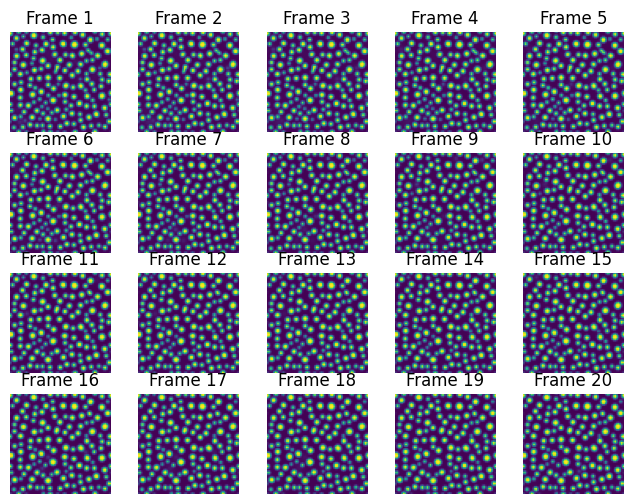

In [32]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_Pd_Rh)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_Pd_Rh[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()

## Engineering Alloy Cu_Mn

#### Image Frame creation from csv files

SpatioTemporal(t, x, y) dimension of data is: 99 x 401 x 401


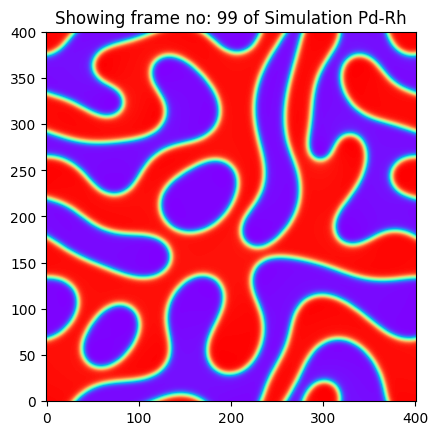

In [33]:
sim_no = 'Pd-Rh' # Simulation Id
csv_files = natsorted(glob.glob(path_Cu_Mn+'*.csv'))  # Importing csv files of simulation naturally sorted

c_values = [] # List of lists of compositions for all coordinate points for all time step
for i, file in enumerate(csv_files): # Looping for all csv files (total csv files = number of time steps)
    df = pd.read_csv(file, index_col=None) # Reading csv file
    df = df.sort_values(by =['Points:1', 'Points:0'], ascending = [True, True]) # Sorting by coordinate x point in ascending order
    dist = df['c'] # Making list of only compositional values
    E = pd.DataFrame(dist) # Making dataframe of compositional list
    E.columns = [os.path.basename(csv_files[i]).split('.')[0]] # Getting time step info from name of csv file  # First it separates whole file path to basename as "00.csv" || and then splits to "00" & "csv" and we need first part "00" only so [0]
    c_values.append(E) # Appending composition to list
    
df_comp = pd.concat(c_values, ignore_index=False, axis=1) # Making dataframe of composition at every coordinate at every time step in ascending time order

x_y_axis = df[['Points:0', 'Points:1']] # getting X and Y coordinate values
data_Cu_Mn = pd.concat([x_y_axis, df_comp], ignore_index=False, axis=1).iloc[:, 2:] ## adding coordinate values to the dataframe of composition

x_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of x-dimension
y_dim = int(x_y_axis.shape[0]**0.5) # The simulation was done in square surface so getting length of y-dimension
t_dim = int(df_comp.shape[1]) # Number of time steps as 3rd dimension of time 

print(f'SpatioTemporal(t, x, y) dimension of data is: {t_dim} x {y_dim} x {x_dim}')

data_Cu_Mn = data_Cu_Mn.to_numpy().reshape(x_dim, y_dim, t_dim)   # Converting dataframe to Numpy and matching x-y-t dimensions
data_Cu_Mn = np.transpose(data_Cu_Mn, (2, 0, 1))   # Transposing Numpy array in format of (t,x,y) from default of (y,x,t)

np.save(path_pf_sim+'/Cu_Mn/Cu_Mn.npy', data_Cu_Mn) # Saving the numpy file 

### Plotting last frame ###
frame_no = t_dim - 1 
plt.imshow(np.squeeze(data_Cu_Mn[frame_no]), cmap="rainbow")
plt.title(f'Showing frame no: {frame_no+1} of Simulation {sim_no}')
plt.gca().invert_yaxis()

#### Video Sequence Creation from image frames

Original Resolution: (99, 401, 401)
 Reduced Resolution: (99, 64, 64)


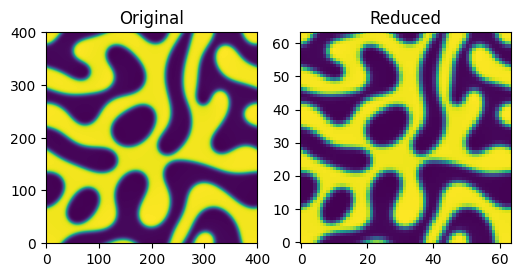

In [34]:
### Lowering Resolution  
def reduce_pixel_size(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

new_shape = (data_Cu_Mn.shape[0], 64, 64)
Cu_Mn_low_res = reduce_pixel_size(data_Cu_Mn, new_shape)
print(f'Original Resolution: {data_Cu_Mn.shape}\n Reduced Resolution: {Cu_Mn_low_res.shape}')

## Plotting Original vs Recude resolution
f, ax = plt.subplot_mosaic('01', figsize=(6, 3))
ax['0'].imshow(data_Cu_Mn[-1], cmap="viridis")
ax['0'].invert_yaxis()
ax['0'].set_title("Original")

ax['1'].imshow(Cu_Mn_low_res[-1], cmap="viridis")
ax['1'].invert_yaxis()
ax['1'].set_title("Reduced")
plt.show()

In [35]:
##### Video Sequences #####

VS_Cu_Mn = []  # list to store the subarrays
for n in range(1, 16):  # jumpting step from 1 to 15  (delta in Figure 1 of paper)
    for i in range(0, Cu_Mn_low_res.shape[0] - 20  , n): # looping in the time step in one simulation (i in Figure 1 of paper)
        video_sequence = Cu_Mn_low_res[i : i + 20, :, :] # taking 20 timestep frames in a video sequence
        VS_Cu_Mn.append(video_sequence) # appending to Video Sequences (list of lists)
        
VS_Cu_Mn = np.array(VS_Cu_Mn)  # convert list to numpy array
np.save(path+'/Step_1_train_test_data/VS_Cu_Mn.npy', VS_Cu_Mn) # saving the Video Sequences 

print(f'Total Image Frame Shape: {Cu_Mn_low_res.shape}\nVideo Sequence Shape: {VS_Cu_Mn.shape}')

Total Image Frame Shape: (99, 64, 64)
Video Sequence Shape: (269, 20, 64, 64)


Displaying frames from Video Sequence No: 180.


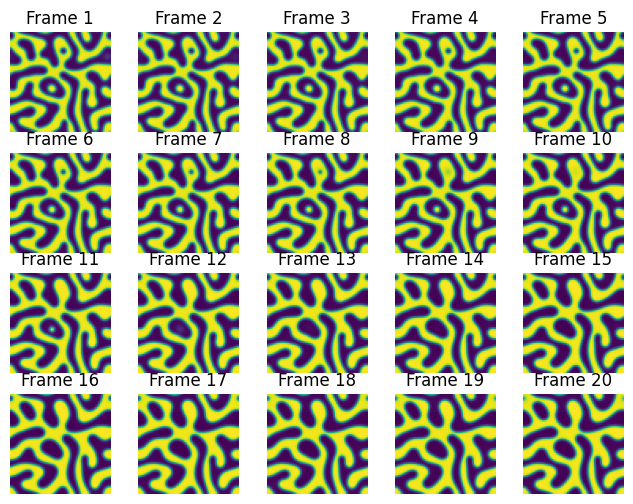

In [36]:
### 20 Frames of one of the Video Sequences ###

fig, axes = plt.subplots(4, 5, figsize=(8, 6))
data_choice = np.random.choice(range(len(VS_Cu_Mn)), size=1)[0] # randomly select one of the video sequences

for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(VS_Cu_Mn[data_choice][idx]), cmap="viridis") 
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames from Video Sequence No: {data_choice}.")
plt.show()